In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.signal import argrelmax, argrelextrema
from scipy.signal import find_peaks
from scipy.fft import fft
import math
from matplotlib.colors import ListedColormap

from onesidedcoupling import OnesidedCoupling

# Inital Parameters

In [4]:
t_step = 0.01
t_last = 100 # 50h -> 1 point represent 1h
t = np.arange(0, 4000, t_step)
keep = int(t_last / t_step)
k = 0.1
gamma = 0.2
mu = 2
beta = 0.5
alpha_up = np.arange(0,20, 0.1)
alpha_down = alpha_up[::-1]

In [5]:
def compute_amplitude(par, t, keep, k, mu, gamma, alpha, beta):
    amp = np.mean(OnesidedCoupling(par, t, keep, k, mu, gamma, alpha, beta).find_peaks_max()[1][1]['peak_heights'][-6:])
    return amp

In [4]:
par0 = -0.83424703, -5.20785553, -3.79697456, -7.95828013
amplitudes_up = []
amplitudes_down = []

for f in alpha_up:
    sol = OnesidedCoupling(par0, t, keep, k, mu, gamma, f, beta).duffvdpsolver()
    par0 = sol[-1]
    print(par0)
    amplitudes_up.append(compute_amplitude(par0, t, keep, k, mu, gamma, f, beta))


par0 = sol[-1]
for j in alpha_down:
    sol = OnesidedCoupling(par0, t, keep, k, mu, gamma, j, beta).duffvdpsolver()
    par0 = sol[-1]  
    print(par0)
    amplitudes_down.append(compute_amplitude(par0, t, keep, k, mu, gamma, j, beta))

[-1.59197529  0.23757149  0.45296582 -0.15196713]
[ 1.07904154 -0.25350063  3.77452289 -0.24712249]
[ 1.56372824 -0.30668446 -0.46584417  0.29770239]
[-1.29855114  0.61733523 -3.52008581 -0.72221509]
[-1.53526311 -0.9130914   0.47942606 -0.42912966]
[ 1.49794872 -0.28190103  3.0532737   0.67105041]
[ 1.5050288   0.83029581 -0.49455757  0.12471827]
[-1.66953051  0.04348005 -2.4358907  -0.56356438]
[-1.47366144 -0.64370329  0.51106988  0.05672674]
[1.80151156 0.08755062 1.7958136  0.42510419]
[ 1.44146155  0.45413525 -0.52893218 -0.12638878]
[-1.89536339 -0.13124024 -1.22641009 -0.30185592]
[-1.40735635 -0.31627698  0.54891596  0.13969153]
[1.95774521 0.13387649 0.7660017  0.21796128]
[ 1.37327814  0.22830496 -0.57003761 -0.13462699]
[-1.99293095 -0.12404956 -0.44537412 -0.16562004]
[-1.33907984 -0.17160842  0.59245422  0.12596699]
[2.01189572 0.11296115 0.2135673  0.13239239]
[ 1.30240809  0.13259874 -0.61791969 -0.11784652]
[-2.01952226 -0.10355276 -0.04009681 -0.11035681]
[-1.26245117

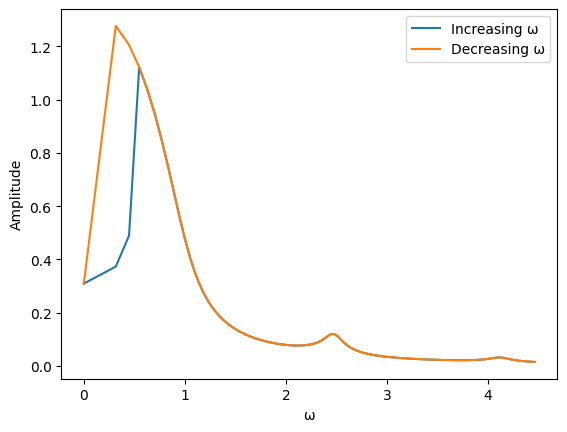

In [5]:

plt.plot(np.sqrt(alpha_up), amplitudes_up, label="Increasing ω")
plt.plot(np.sqrt(alpha_down), amplitudes_down, label="Decreasing ω")
plt.xlabel("ω")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

# Attractor

In [11]:
alpha_up = np.arange(0.2,3, 0.1)
alpha_down = alpha_up[::-1]

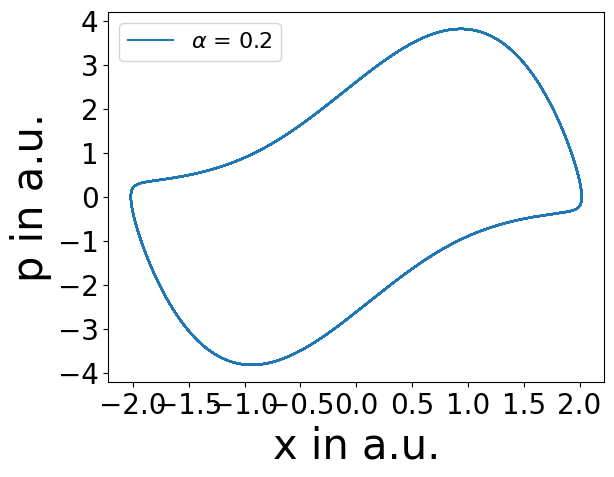

In [ ]:

for j in np.arange(0.2, 0.3, 0.1):
    sol = OnesidedCoupling(par0, t, keep, k, mu, gamma, j, beta).duffvdpsolver()
    par0 = sol[-1]
    xsol = sol[-keep:, 0]
    psol = sol[-keep:, 2]


    plt.plot(xsol,psol, label = "$\\alpha$ = " + str(round(j, 2)))
plt.xlabel("x in a.u.",fontsize = 30)
plt.ylabel("p in a.u.",fontsize = 30)
plt.legend(fontsize = 16)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()


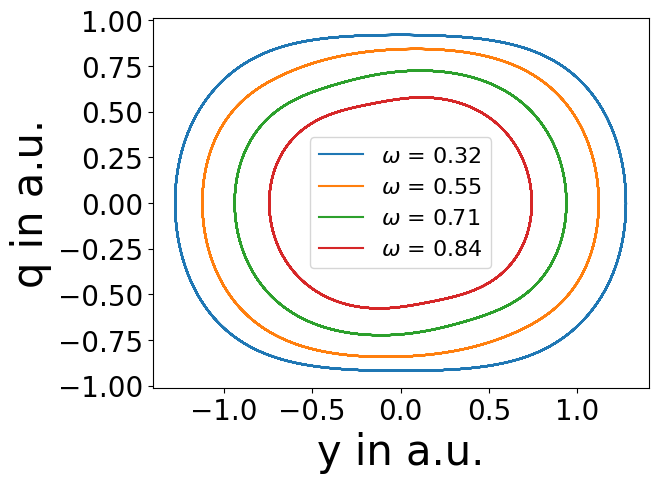

In [60]:
par0 = 3,3,3,3
for j in np.arange(0.1, 0.8, 0.2):
    sol = OnesidedCoupling(par0, t, keep, k, mu, gamma, j, beta).duffvdpsolver()
    par0 = sol[-1]
    ysol = sol[-keep:, 1]
    qsol = sol[-keep:, 3]
    plt.plot(ysol,qsol, label = "$\\omega$ = " + str(round(np.sqrt(j), 2)))

plt.xlabel("y in a.u.",fontsize = 30)
plt.ylabel("q in a.u.",fontsize = 30)
plt.legend(fontsize = 16)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

0.1
0.30000000000000004
0.5000000000000001
0.7000000000000002


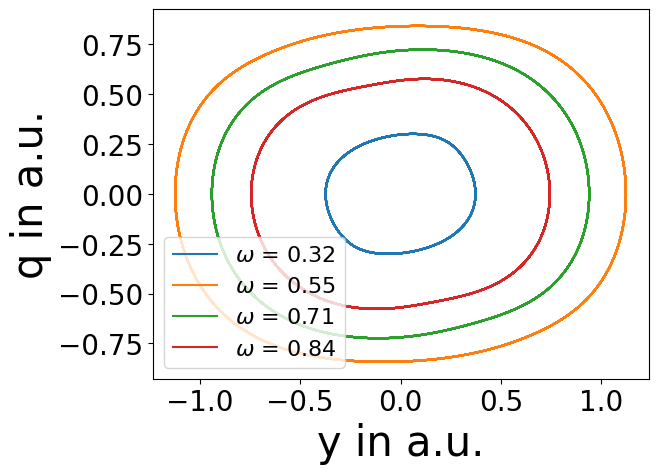

In [48]:
par0 = 0.3, 0.3, 0.3, 0.3
for j in np.arange(0.1, 0.8, 0.2):
    sol = OnesidedCoupling(par0, t, keep, k, mu, gamma, j, beta).duffvdpsolver()
    print(j)
    par0 = sol[-1]
    ysol = sol[-keep:, 1]
    qsol = sol[-keep:, 3]
    plt.plot(ysol,qsol, label = "$\\omega$ = " + str(round(np.sqrt(j), 2)))

plt.xlabel("y in a.u.",fontsize = 30)
plt.ylabel("q in a.u.",fontsize = 30)
plt.legend(fontsize = 16)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

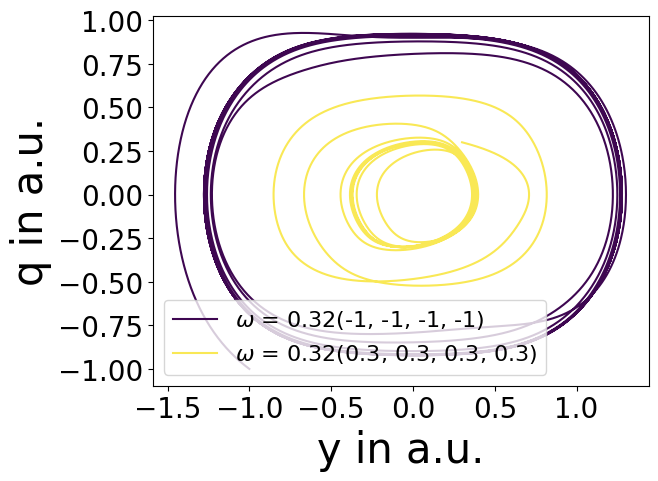

In [38]:
par0 = -1, -1, -1, -1
alph = np.arange(0.1, 0.8, 0.2)[0]

sol = OnesidedCoupling(par0, t, keep, k, mu, gamma, alph, beta).duffvdpsolver()
ysol = sol[:keep, 1]
qsol = sol[:keep, 3]

par1 = 0.3,0.3,0.3,0.3

sol1 = OnesidedCoupling(par1, t, keep, k, mu, gamma, alph, beta).duffvdpsolver()
ysol1 = sol1[:keep, 1]
qsol1 = sol1[:keep, 3]
plt.plot(ysol,qsol, label = "$\\omega$ = " + str(round(np.sqrt(alph),2)) + str(par0), color = "#3E0751")
plt.plot(ysol1,qsol1, label = "$\\omega$ = " + str(round(np.sqrt(alph), 2))+ str(par1), color = "#F9E855")

plt.xlabel("y in a.u.",fontsize = 30)
plt.ylabel("q in a.u.",fontsize = 30)
plt.legend(fontsize = 16)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

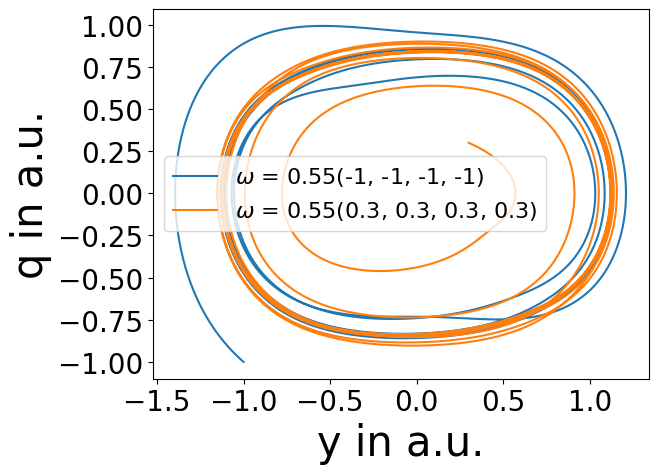

In [67]:
par0 = -1, -1, -1, -1
alph = np.arange(0.1, 0.8, 0.2)[1]

sol = OnesidedCoupling(par0, t, keep, k, mu, gamma, alph, beta).duffvdpsolver()
ysol = sol[:keep, 1]
qsol = sol[:keep, 3]

par1 = 0.3,0.3,0.3,0.3

sol1 = OnesidedCoupling(par1, t, keep, k, mu, gamma, alph, beta).duffvdpsolver()
ysol1 = sol1[:keep, 1]
qsol1 = sol1[:keep, 3]
plt.plot(ysol,qsol, label = "$\\omega$ = " + str(round(np.sqrt(alph),2)) + str(par0))
plt.plot(ysol1,qsol1, label = "$\\omega$ = " + str(round(np.sqrt(alph), 2))+ str(par1))

plt.xlabel("y in a.u.",fontsize = 30)
plt.ylabel("q in a.u.",fontsize = 30)
plt.legend(fontsize = 16)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

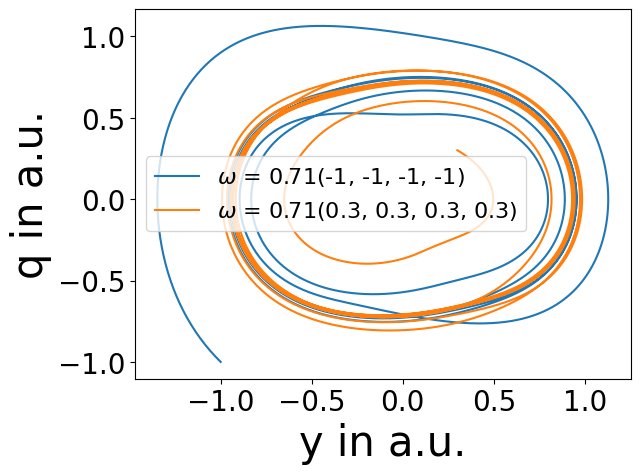

In [66]:
par0 = -1, -1, -1, -1
alph = np.arange(0.1, 0.8, 0.2)[2]

sol = OnesidedCoupling(par0, t, keep, k, mu, gamma, alph, beta).duffvdpsolver()
ysol = sol[:keep, 1]
qsol = sol[:keep, 3]

par1 = 0.3,0.3,0.3,0.3

sol1 = OnesidedCoupling(par1, t, keep, k, mu, gamma, alph, beta).duffvdpsolver()
ysol1 = sol1[:keep, 1]
qsol1 = sol1[:keep, 3]
plt.plot(ysol,qsol, label = "$\\omega$ = " + str(round(np.sqrt(alph),2)) + str(par0))
plt.plot(ysol1,qsol1, label = "$\\omega$ = " + str(round(np.sqrt(alph), 2))+ str(par1))

plt.xlabel("y in a.u.",fontsize = 30)
plt.ylabel("q in a.u.",fontsize = 30)
plt.legend(fontsize = 16)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

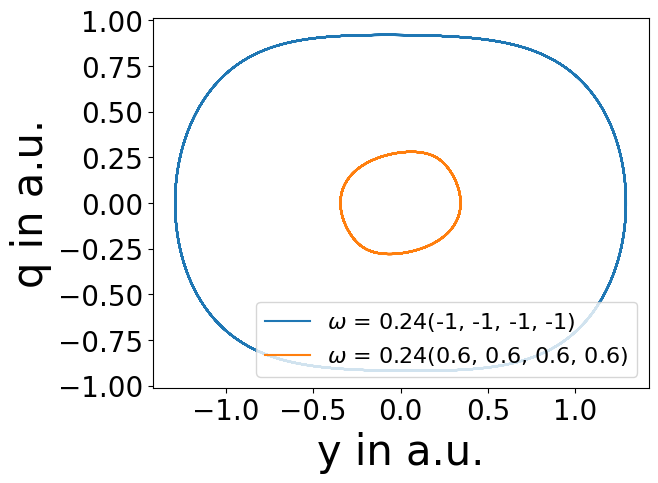

In [79]:
par0 = -1, -1, -1, -1
alph = 0.06

sol = OnesidedCoupling(par0, t, keep, k, mu, gamma, alph, beta).duffvdpsolver()
ysol = sol[-keep:, 1]
qsol = sol[-keep:, 3]

par1 = 0.6, 0.6, 0.6, 0.6

sol1 = OnesidedCoupling(par1, t, keep, k, mu, gamma, alph, beta).duffvdpsolver()
ysol1 = sol1[-keep:, 1]
qsol1 = sol1[-keep:, 3]
plt.plot(ysol,qsol, label = "$\\omega$ = " + str(round(np.sqrt(alph),2)) + str(par0))
plt.plot(ysol1,qsol1, label = "$\\omega$ = " + str(round(np.sqrt(alph), 2))+ str(par1))

plt.xlabel("y in a.u.",fontsize = 30)
plt.ylabel("q in a.u.",fontsize = 30)
plt.legend(fontsize = 16)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [108]:
print(max(ysol1))
print(max(ysol))

1.2914453327488113
0.3440995729743191


# Einzugsbereich (Basin of Attraction)

In [21]:
alph = np.linspace(0.05,0.2, 2)
alph
alph = np.linspace(0.0667,0.2, 9)
alph

array([0.0667   , 0.0833625, 0.100025 , 0.1166875, 0.13335  , 0.1500125,
       0.166675 , 0.1833375, 0.2      ])

1.205373174000411
[[1.21 0.49 1.21 1.21 1.21 0.49 1.21 1.21]
 [0.49 1.21 1.21 1.21 0.49 0.49 0.49 1.21]
 [0.49 1.21 1.21 1.21 0.49 0.49 0.49 1.21]
 [0.49 1.21 1.21 1.21 0.49 0.49 0.49 1.21]
 [ nan  nan  nan  nan  nan  nan  nan  nan]
 [1.21 1.21 0.49 0.49 0.49 1.21 1.21 1.21]
 [1.21 1.21 0.49 0.49 0.49 1.21 1.21 1.21]
 [1.21 1.21 0.49 0.49 0.49 1.21 1.21 1.21]]
[[1. 0. 1. 1. 1. 0. 1. 1.]
 [0. 1. 1. 1. 0. 0. 0. 1.]
 [0. 1. 1. 1. 0. 0. 0. 1.]
 [0. 1. 1. 1. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 0. 0. 0. 1. 1. 1.]
 [1. 1. 0. 0. 0. 1. 1. 1.]
 [1. 1. 0. 0. 0. 1. 1. 1.]]


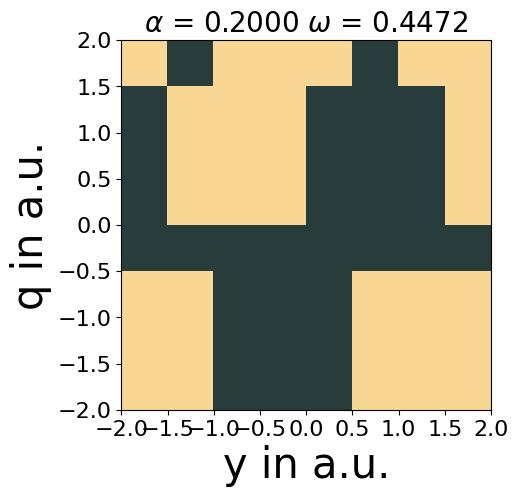

In [55]:
alph = [0.2]
cmap = ListedColormap(["#283D3B", "#F8D794"])

for i in alph:
    x_par = np.arange(-2,2,0.5)
    y_par = np.arange(-2,2,0.5)
    p_par = np.arange(-2,2,0.5)
    q_par = np.arange(-2,2,0.5)
  

    y,p = np.meshgrid(y_par,p_par)
    attractor = np.zeros_like(y)
    y_amplitude_matrix = np.zeros_like(y)
    par0 = -1, -1, -1, -1

    sol = max(OnesidedCoupling(par0, t, keep, k, mu, gamma, i, beta).duffvdpsolver()[-keep:, 1])

    for l in range(len(y_par)):
        for m in range(len(p_par)):

            par0 = [x_par[l], y_par[m], p_par[l], q_par[m]]
            y_amplitude = compute_amplitude(par0, t, keep, k, mu, gamma, i, beta)
            y_amplitude_matrix[l,m] = round(y_amplitude, 2)
            
            if math.isclose(y_amplitude, sol, rel_tol=1e-1):
                attractor[l,m] = 1

            
            else: 
                attractor[l,m] = 0
    
    print(sol)
    print(y_amplitude_matrix)
    print(attractor)
    
    plt.imshow(attractor, extent=[-2,2,-2,2], cmap = cmap)
    plt.xlabel("y in a.u.",fontsize = 30)
    plt.ylabel("q in a.u.",fontsize = 30)
    plt.xticks(fontsize = 16)
    plt.yticks(fontsize = 16)
    plt.title(label = "$\\alpha$ = " + f"{i:.4f}" + " $\\omega$ = " + f"{np.sqrt(i):.4f}", fontsize = 20)

    
    plt.show()
            


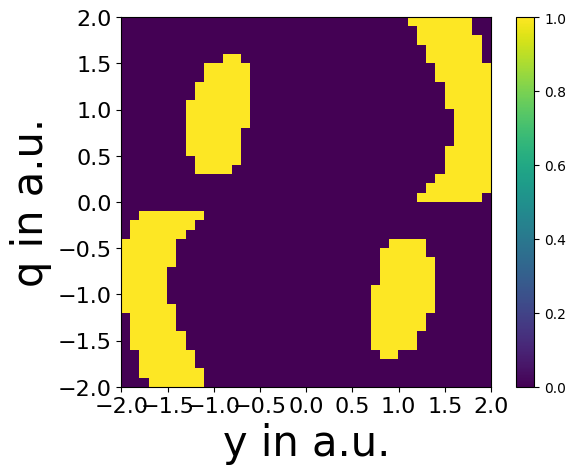

In [ ]:
plt.imshow(attractor, extent=[-2,2,-2,2]) # alph = 0.06
plt.xlabel("y in a.u.",fontsize = 30)
plt.ylabel("q in a.u.",fontsize = 30)
plt.xticks(fontsize = 16)
plt.colorbar()
plt.yticks(fontsize = 16)
plt.show()

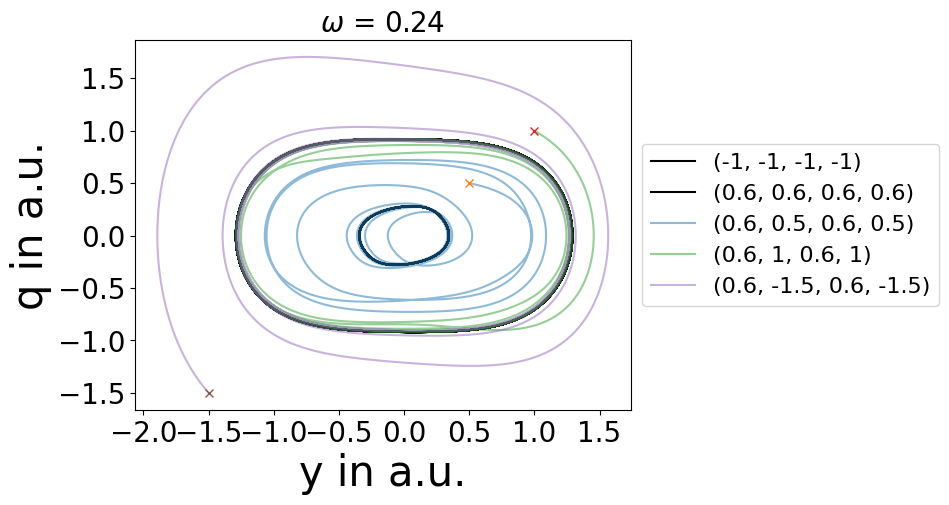

In [17]:
from pathlib import Path
par0 = -1, -1, -1, -1
alph = 0.06

sol = OnesidedCoupling(par0, t, keep, k, mu, gamma, alph, beta).duffvdpsolver()
ysol = sol[-keep:, 1]
qsol = sol[-keep:, 3]

par1 = 0.6, 0.6, 0.6, 0.6

sol1 = OnesidedCoupling(par1, t, keep, k, mu, gamma, alph, beta).duffvdpsolver()
ysol1 = sol1[-keep:, 1]
qsol1 = sol1[-keep:, 3]

par2 = 0.6, 0.5, 0.6, 0.5

sol2 = OnesidedCoupling(par2, t, keep, k, mu, gamma, alph, beta).duffvdpsolver()
ysol2 = sol2[:keep, 1]
qsol2 = sol2[:keep, 3]

par3 = 0.6, 1, 0.6, 1

sol3 = OnesidedCoupling(par3, t, keep, k, mu, gamma, alph, beta).duffvdpsolver()
ysol3 = sol3[:keep, 1]
qsol3 = sol3[:keep, 3]


par4 = 0.6, -1.5, 0.6, -1.5

sol4 = OnesidedCoupling(par4, t, keep, k, mu, gamma, alph, beta).duffvdpsolver()
ysol4 = sol4[:keep, 1]
qsol4 = sol4[:keep, 3]


plt.plot(ysol,qsol, label = str(par0), color = "k")
plt.plot(ysol1,qsol1, label = str(par1), color = "k")
plt.plot(ysol2,qsol2, label = str(par2), alpha = 0.5)
plt.plot(ysol2[0],qsol2[0], "x")

plt.plot(ysol3,qsol3, label = str(par3), alpha = 0.5)
plt.plot(ysol3[0],qsol3[0], "x")

plt.plot(ysol4,qsol4, label = str(par4), alpha = 0.5)
plt.plot(ysol4[0],qsol4[0], "x")

plt.xlabel("y in a.u.",fontsize = 30)
plt.ylabel("q in a.u.",fontsize = 30)
plt.legend(fontsize = 16, loc = "center left", bbox_to_anchor = (1, 0.5))
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.title("$\\omega$ = " + str(round(np.sqrt(alph), 2)), fontsize = 20)

plt.savefig("Trajectory_" + f"{round(alph,4)}" + ".png", dpi =  300, bbox_inches = "tight")
plt.show()

In [19]:
alph = np.linspace(0.05,0.2, 10)
alph

array([0.05      , 0.06666667, 0.08333333, 0.1       , 0.11666667,
       0.13333333, 0.15      , 0.16666667, 0.18333333, 0.2       ])